In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,5)

1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).

In [2]:
def calc_logloss(y, p):
    """логистическая функция потерь"""
    eps = 1e-15
    p_ = np.clip(p, eps, 1.0 - eps)
    err = np.mean(- y * np.log(p_) - (1.0 - y) * np.log(1.0 - p_))
    return err

In [3]:
calc_logloss(0, 0), calc_logloss(0, 0.5), calc_logloss(0, 1)

(9.992007221626415e-16, 0.6931471805599453, 34.53957599234088)

2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],  # возраст репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0]) # подходит или нет репетитор

X

array([[1.00e+00, 1.00e+00, 5.00e+02, 2.10e+01],
       [1.00e+00, 1.00e+00, 7.00e+02, 2.50e+01],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.70e+01],
       [1.00e+00, 1.00e+00, 6.00e+02, 2.00e+01],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.50e+01],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.80e+01],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.50e+01],
       [1.00e+00, 1.00e+01, 2.00e+03, 6.00e+01],
       [1.00e+00, 1.00e+00, 4.50e+02, 2.00e+01],
       [1.00e+00, 2.00e+00, 1.00e+03, 3.00e+01]])

In [5]:
def standardization(X):
    """стандартизация признаков"""
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
       [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
       [ 1.        , -0.21428571, -0.46401617, -0.09388003],
       [ 1.        , -0.57142857, -0.77336028, -0.69129842],
       [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
       [ 1.        , -0.92857143, -0.36090146, -0.86198939],
       [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
       [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
       [ 1.        , -0.57142857, -1.08270439, -0.69129842],
       [ 1.        , -0.21428571,  0.05155735,  0.16215642]])

In [6]:
def sigmoid(z):
    """сигмоида"""
    return 1 / (1 + np.exp(-z))

In [7]:
def eval_LR_model(X, y, iterations, eta=1e-4):
    """логистическая регрессия"""
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]
        w -= eta * (1/n * np.dot((pred - y), X))
        err = calc_logloss(y, sigmoid(np.dot(X, w)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
        errors.append(err)
    return w, errors

In [8]:
w, _ = eval_LR_model(X_st, y, iterations=100, eta=0.1)

10 [ 0.36065583 -0.3972585   0.51937535  1.19161524] 0.972199021173242
20 [ 0.215788   -0.61251766  0.44159174  0.90102578] 0.8152129340815597
30 [ 0.08277136 -0.76559453  0.42551123  0.67107078] 0.7212678942568461
40 [-0.02507329 -0.85541749  0.46585326  0.50463174] 0.6722796074198796
50 [-0.10912684 -0.90576455  0.53830407  0.37884616] 0.6416699927595096
60 [-0.17469927 -0.93640342  0.62421319  0.27424279] 0.6181685428656378
70 [-0.22617113 -0.95733883  0.71436092  0.18090474] 0.5982903907109156
80 [-0.26681997 -0.97319728  0.80460517  0.09421158] 0.5807656397146188
90 [-0.29911987 -0.98614533  0.89312045  0.01196478] 0.5649873364632755
100 [-0.32495521 -0.99723356  0.97913034 -0.06693668] 0.5506011060815837


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


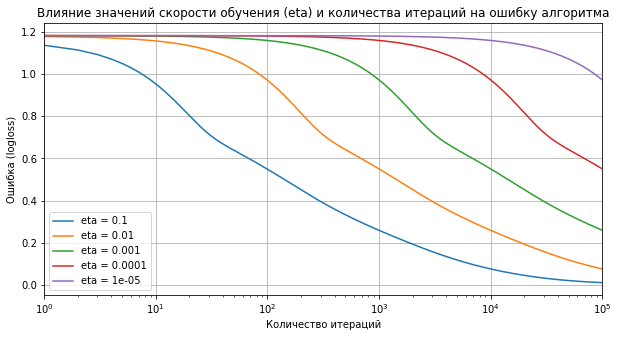

In [9]:
iterations = 10**5+1

fig = plt.figure()
plt.xscale("log")
plt.xlim(1, iterations)
plt.xlabel("Количество итераций")
plt.ylabel("Ошибка (logloss)")
plt.title("Влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма")
plt.grid()

for i in (1, 2, 3, 4, 5):
    eta = 10**(-i)
    _, errors = eval_LR_model(X_st, y, iterations, eta)
    plt.plot(errors, label=f"{eta = }")

plt.legend()
plt.show()

3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`.

In [10]:
def calc_pred_proba(X, weights):
    """предсказанная вероятность класса '1'"""
    return sigmoid(X @ weights)

In [11]:
print('prob =', calc_pred_proba(X_st, w).round(2))

prob = [0.34 0.43 0.36 0.39 0.62 0.58 0.46 0.25 0.32 0.48]


4. Создайте функцию `calc_pred`, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности.

In [12]:
def calc_pred(X, weights, threshold):
    """предсказанные классы (0 или 1)"""
    pred = calc_pred_proba(X, weights)
    return np.where(pred > threshold, 1, 0)

In [13]:
print('true =', y)
print('pred =', calc_pred(X_st, w, 0.5))

true = [0 0 0 1 1 1 1 0 0 0]
pred = [0 0 0 0 1 1 0 0 0 0]


5. (\*) Напишите функции для расчёта accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [14]:
def confusion_matrix(y_true: np.array, y_pred: np.array) -> np.array:
    """матрица ошибок"""
    yt = y_true.astype(bool)
    yp = y_pred.astype(bool)
    TP = np.sum(yt & yp)
    TN = np.sum(~yt & ~yp)
    FP = np.sum(~yt & yp)
    FN = np.sum(yt & ~yp)
    return np.array([[TP, FP], [FN, TN]])


def accuracy(y_true: np.array, y_pred: np.array) -> float:
    """верность"""
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).flatten()
    return (TP + TN) / (TP + TN + FP + FN)


def precision(y_true: np.array, y_pred: np.array) -> float:
    """точность"""
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).flatten()
    return TP / (TP + FP)


def recall(y_true: np.array, y_pred: np.array) -> float:
    """полнота"""
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).flatten()
    return TP / (TP + FN)


def f1_score(y_true: np.array, y_pred: np.array) -> float:
    """F-мера"""
    PPV = precision(y_true, y_pred)
    TPR = recall(y_true, y_pred)
    return 2 * (PPV * TPR) / (PPV + TPR)

In [15]:
y_ = calc_pred(X_st, w, 0.5)
print(confusion_matrix(y, y_))
print("accuracy = ", accuracy(y, y_))
print("precision = ", precision(y, y_))
print("recall = ", recall(y, y_))
print("F1-score = ", f1_score(y, y_))

[[2 0]
 [2 6]]
accuracy =  0.8
precision =  1.0
recall =  0.5
F1-score =  0.6666666666666666


In [16]:
# проверка
import sklearn.metrics as skm
tn, fp, fn, tp = skm.confusion_matrix(y, y_).ravel()
print(np.array([[tp, fp], [fn, tn]]))
print("accuracy = ", skm.accuracy_score(y, y_))
print("precision = ", skm.precision_score(y, y_))
print("recall = ", skm.recall_score(y, y_))
print("F1-score = ", skm.f1_score(y, y_))

[[2 0]
 [2 6]]
accuracy =  0.8
precision =  1.0
recall =  0.5
F1-score =  0.6666666666666666
